### In this project, we will predict whether a patient will have a heart stroke or not based on his/her comorbidities, work, and lifestyle.

![(stroke.jpg)](stroke.jpg)

## Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Making visualizations

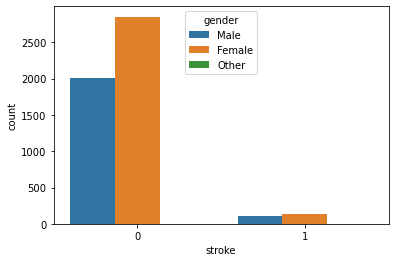

In [5]:
#Number of people of each gender had stoke
# making count plot
sns.countplot(x=data.stroke,hue=data.gender);

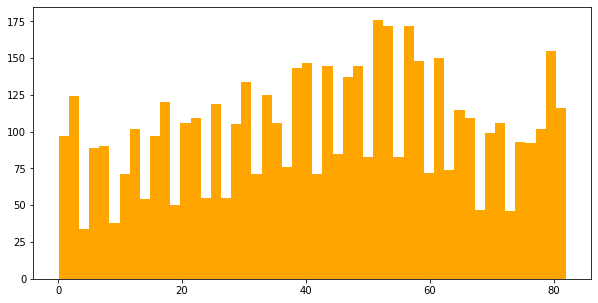

In [6]:
plt.figure(figsize=(10,5),)
plt.hist(x=data["age"],bins=50,color="orange");

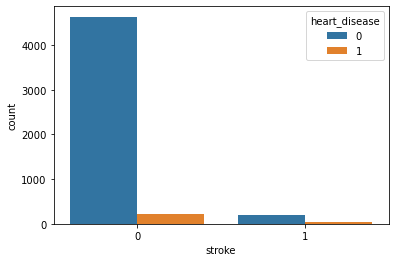

In [7]:
# heart disease and stroke
sns.countplot(x=data["stroke"],hue=data["heart_disease"]);

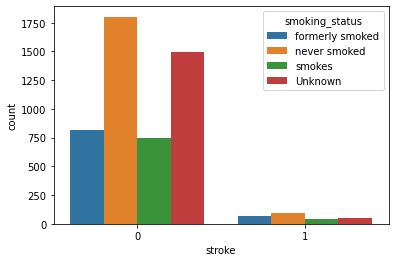

In [8]:
# smoking statuse and got stroke or not
sns.countplot(x=data["stroke"],hue=data["smoking_status"]);

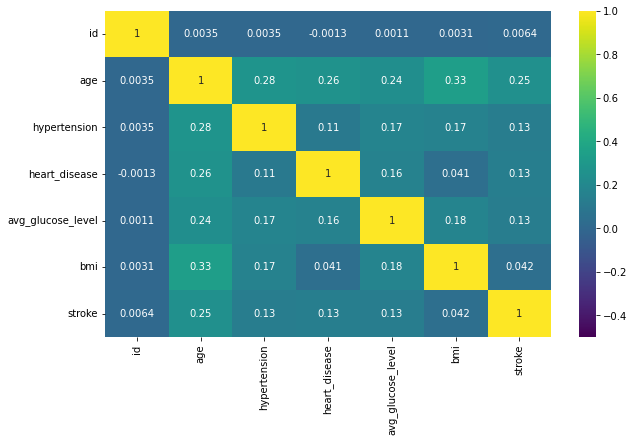

In [9]:
#find out correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="viridis",vmin=-0.5);

## find out missing values

In [10]:
# find missing values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### What is Bmi?

Body Mass Index (BMI) is a person's weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.
    

In [11]:
data.drop(data[data.bmi.isna()].index,inplace=True)

In [12]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
data.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [14]:
# now drop unwanted columns
data.drop(columns="id",axis=1,inplace=True)

In [15]:
X=data.drop(columns="stroke",axis=1)
y=data.stroke

## make all columns numerical

In [16]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["gender", "hypertension" ,"heart_disease","ever_married","work_type","Residence_type","smoking_status"] 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.  ,   1.  ,   0.  , ...,  67.  , 228.69,  36.6 ],
       [  0.  ,   1.  ,   0.  , ...,  80.  , 105.92,  32.5 ],
       [  1.  ,   0.  ,   0.  , ...,  49.  , 171.23,  34.4 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  35.  ,  82.99,  30.6 ],
       [  0.  ,   1.  ,   0.  , ...,  51.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,  44.  ,  85.28,  26.2 ]])

In [17]:
data = pd.DataFrame(transformed_X)

## Split the data

In [18]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=43)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
model.score(X_test,y_test)

0.9613034623217923

In [21]:
from sklearn.svm import SVC
SVC_Gaussian = SVC(kernel='rbf')

In [22]:
SVC_Gaussian.fit(X_train,y_train)
SVC_Gaussian.score(X_test,y_test)

0.9633401221995926

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
y_preds=SVC_Gaussian.predict(X_test)

### Making confusion Matrix

In [25]:
confusion_matrix(y_test,y_preds)

array([[946,   0],
       [ 36,   0]], dtype=int64)

In [26]:
accuracy_score(y_test,y_preds)

0.9633401221995926

**Our Final Model accuracy is 96.334%**